<a href="https://colab.research.google.com/github/Sriram71/Brain_TumourClassification/blob/main/Brain_Tumour_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Image Processing
## Project by:
1. Sai Sriram Harshit Javvadi
2. Jeevan Kumar

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

Without any Filtering or Image Processing

In [ ]:
path = "./data"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

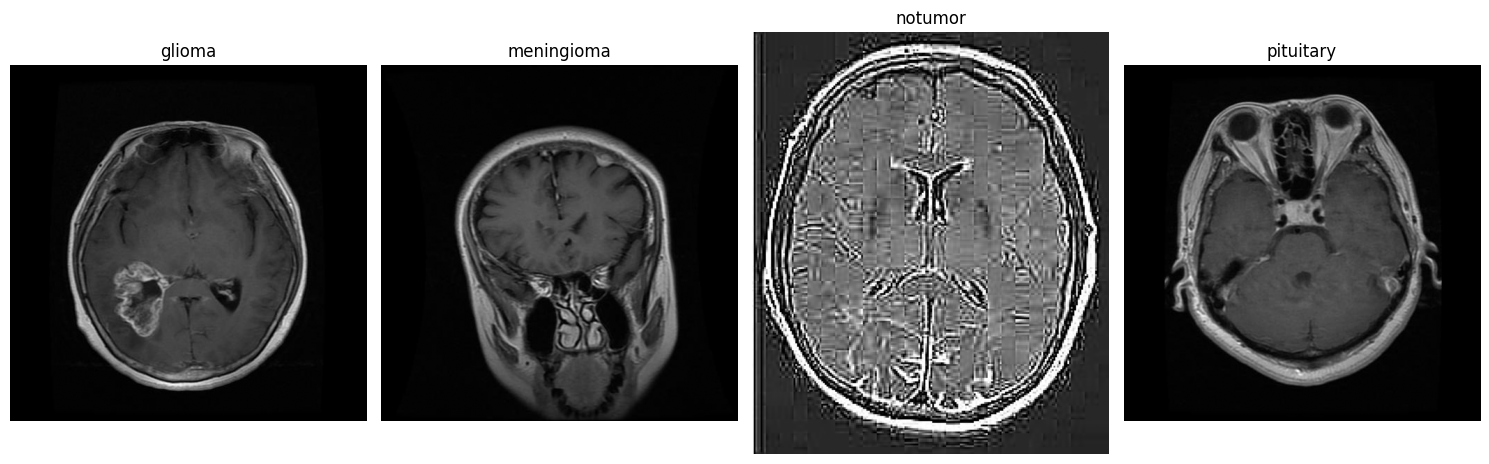

In [ ]:
def visualize_samples(dataset_path, categories):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    for i, category in enumerate(categories):
        folder_path = os.path.join(dataset_path, "Training", category)
        img_name = os.listdir(folder_path)[0]
        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(category)
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


visualize_samples(path, categories)

In [ ]:
IMG_SIZE = 150

def load_dataset(data_type="Training"):
    data = []
    labels = []

    for i, category in enumerate(categories):
        folder_path = os.path.join(path, data_type, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            # Read image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip if image is unreadable

            # Resize image
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            # Normalize (convert pixels to range 0-1)
            img = img / 255.0

            # Append to dataset
            data.append(img)
            labels.append(i)  # Label = index of category

    # Convert to NumPy arrays
    data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Add channel dimension
    labels = np.array(labels)

    return data, labels

In [ ]:
X_train, y_train = load_dataset("Training")
X_test, y_test = load_dataset("Testing")

y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Labels: {y_test.shape}")

Training data shape: (5712, 150, 150, 1), Labels: (5712, 4)
Testing data shape: (1311, 150, 150, 1), Labels: (1311, 4)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),  # Helps prevent overfitting
        Dense(4, activation="softmax"),  # 4 output classes
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Show model summary
model.summary()

/Users/krishnariya/tumor_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,292 (18.42 MB)

 Trainable params: 4,828,292 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test)
)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 160ms/step - accuracy: 0.5951 - loss: 0.9367 - val_accuracy: 0.7910 - val_loss: 0.5117
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 159ms/step - accuracy: 0.8275 - loss: 0.4487 - val_accuracy: 0.8490 - val_loss: 0.3837
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.8751 - loss: 0.3119 - val_accuracy: 0.8581 - val_loss: 0.3224
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 157ms/step - accuracy: 0.9047 - loss: 0.2453 - val_accuracy: 0.8902 - val_loss: 0.2601
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 164ms/step - accuracy: 0.9170 - loss: 0.2027 - val_accuracy: 0.9283 - val_loss: 0.1930
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 162ms/step - accuracy: 0.9442 - loss: 0.1470 - val_accuracy: 0.9283 - val_loss: 0.2032
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 164ms/step - accuracy: 0.9577 - loss: 0.1164 - val_accuracy: 0.9413 - val_loss: 0.1819
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.9631 - loss: 0

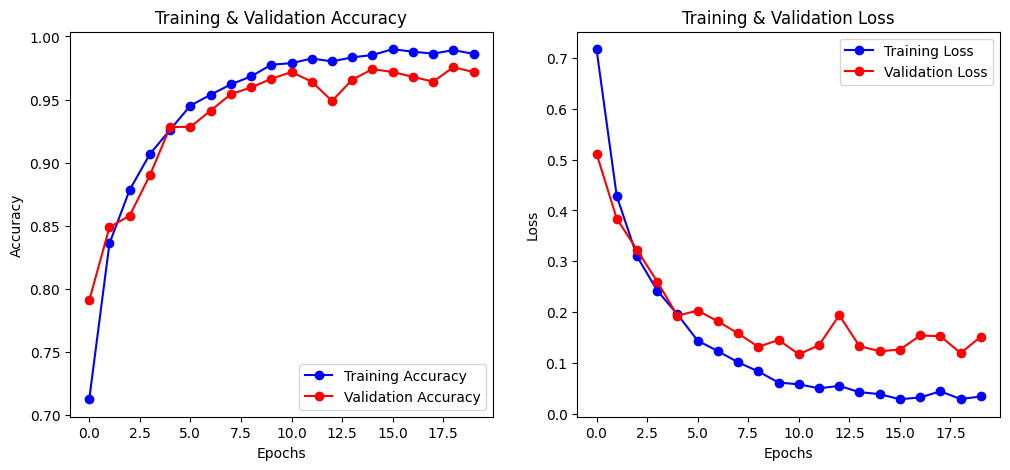

In [ ]:
# Extract training and validation accuracy & loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  # Number of epochs

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "bo-", label="Training Accuracy")
plt.plot(epochs, val_acc, "ro-", label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro-", label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to a new image
img_path = "./Brain Tumor MRI Dataset/Testing/glioma/Te-gl_0010.jpg"  # Change this to your test image path

img = image.load_img(img_path, target_size=(150, 150), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Map class index to label
class_labels = ["glioma", "meningioma", "notumor", "pituitary"]
print(f"Predicted class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: glioma


Median Filtering

In [ ]:
path = "./data"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

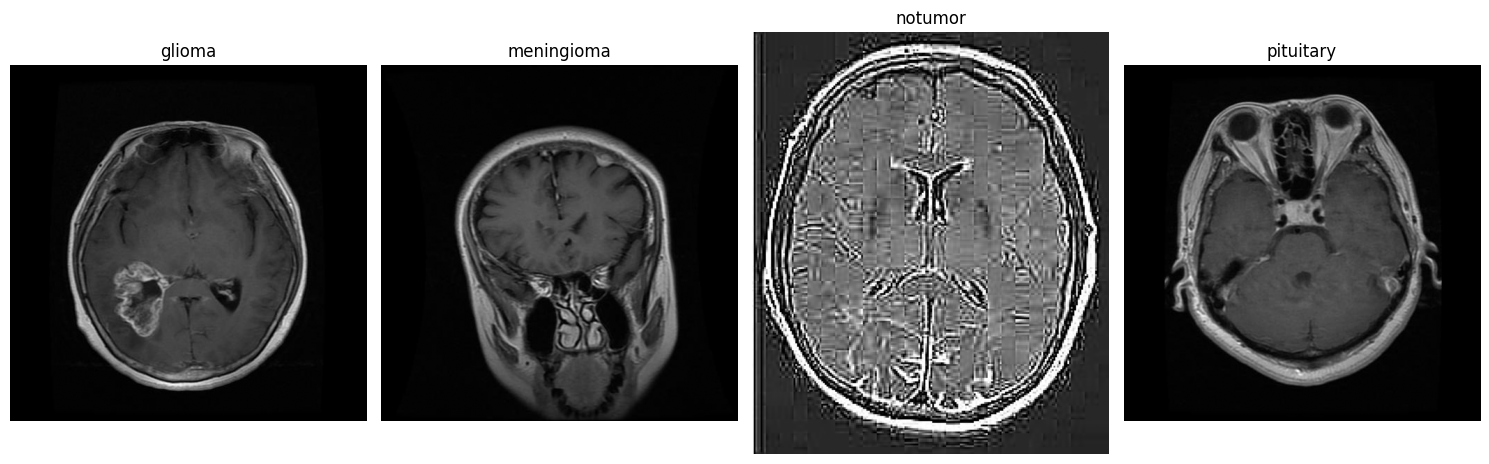

In [ ]:
def visualize_samples(dataset_path, categories):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    for i, category in enumerate(categories):
        folder_path = os.path.join(dataset_path, "Training", category)
        img_name = os.listdir(folder_path)[0]
        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(category)
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


visualize_samples(path, categories)

In [ ]:
IMG_SIZE = 150


def apply_median_filtering(image, kernel_size=3):
    return cv2.medianBlur((image * 255).astype(np.uint8), kernel_size) / 255.0


def load_dataset(data_type="Training"):
    data = []
    labels = []

    for i, category in enumerate(categories):
        folder_path = os.path.join(path, data_type, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            # Read image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip if image is unreadable

            # Resize image
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            # Normalize (convert pixels to range 0-1)
            img = img / 255.0

            # Apply median filtering
            img = apply_median_filtering(img)

            # Append to dataset
            data.append(img)
            labels.append(i)  # Label = index of category

    # Convert to NumPy arrays
    data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Add channel dimension
    labels = np.array(labels)

    return data, labels


# Median Filtering and Custom Generator (retained for reference)
def custom_generator(generator, kernel_size=3):
    for batch_images, batch_labels in generator:
        filtered_images = np.array(
            [apply_median_filtering(img, kernel_size) for img in batch_images]
        )
        yield filtered_images, batch_labels

Training data shape: (5712, 150, 150, 1), Labels: (5712, 4)
Testing data shape: (1311, 150, 150, 1), Labels: (1311, 4)


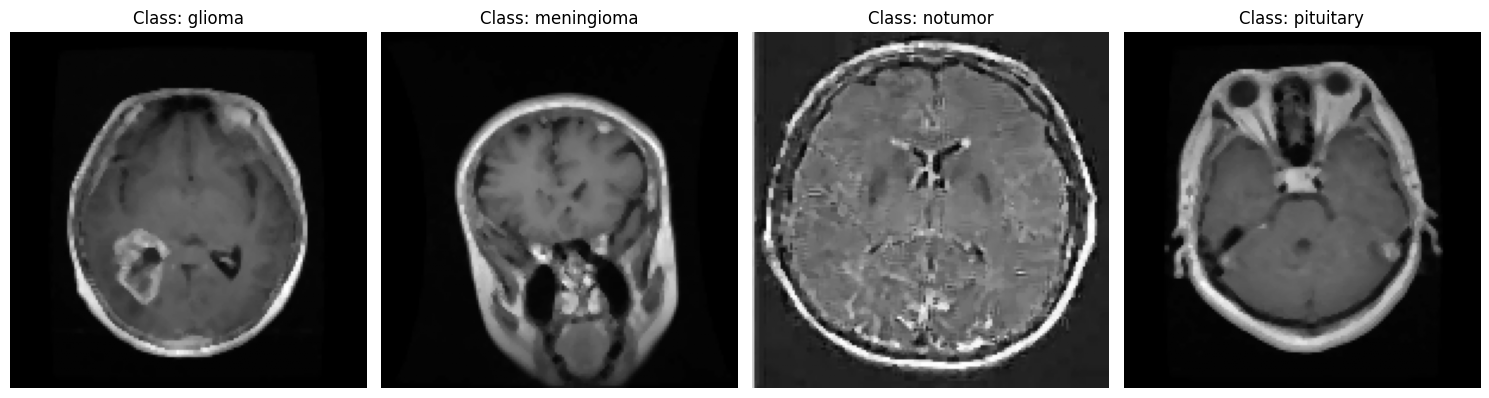

In [ ]:
import matplotlib.pyplot as plt

# Load datasets
X_train, y_train = load_dataset("Training")
X_test, y_test = load_dataset("Testing")

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Labels: {y_test.shape}")

# Display one sample per category
plt.figure(figsize=(15, 8))
for i, category in enumerate(categories):
    # Find the first occurrence of this category in y_train
    idx = np.argmax(y_train[:, i])
    img = X_train[idx].squeeze()  # Remove channel dimension for display

    plt.subplot(2, 4, i + 1)  # Adjust grid size based on number of categories
    plt.imshow(img, cmap="gray")
    plt.title(f"Class: {category}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),  # Helps prevent overfitting
        Dense(4, activation="softmax"),  # 4 output classes
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Show model summary
model.summary()

/Users/krishnariya/tumor_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,292 (18.42 MB)

 Trainable params: 4,828,292 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test)
)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 163ms/step - accuracy: 0.6179 - loss: 0.9026 - val_accuracy: 0.7864 - val_loss: 0.5078
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 163ms/step - accuracy: 0.8436 - loss: 0.4130 - val_accuracy: 0.8513 - val_loss: 0.3948
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.8918 - loss: 0.3059 - val_accuracy: 0.8703 - val_loss: 0.3129
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.9184 - loss: 0.2094 - val_accuracy: 0.9207 - val_loss: 0.2075
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - accuracy: 0.9369 - loss: 0.1797 - val_accuracy: 0.9336 - val_loss: 0.1882
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.9549 - loss: 0.1165 - val_accuracy: 0.9428 - val_loss: 0.1994
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 159ms/step - accuracy: 0.9653 - loss: 0.0975 - val_accuracy: 0.9611 - val_loss: 0.1275
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.9715 - loss: 0

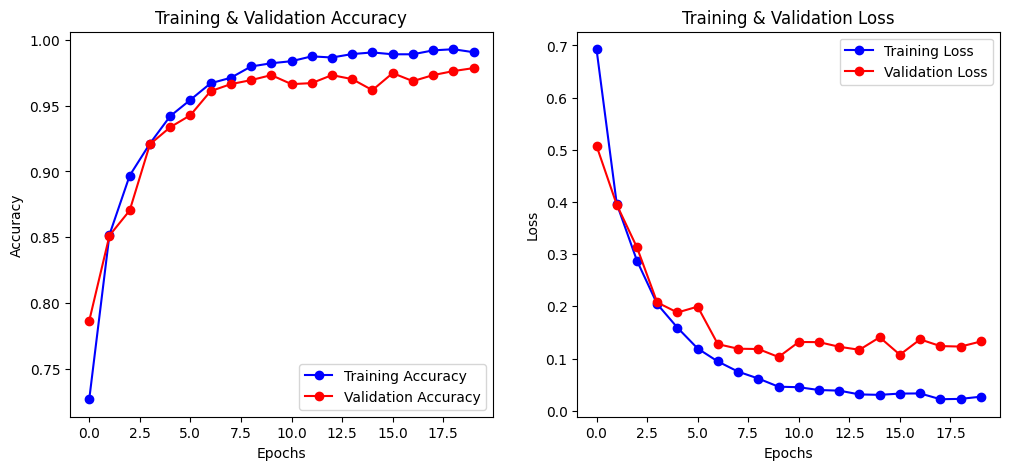

In [ ]:
# Extract training and validation accuracy & loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  # Number of epochs

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "bo-", label="Training Accuracy")
plt.plot(epochs, val_acc, "ro-", label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro-", label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to a new image
img_path = "./data/Testing/glioma/Te-gl_0010.jpg"  # Change this to your test image path

img = image.load_img(img_path, target_size=(150, 150), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Map class index to label
class_labels = ["glioma", "meningioma", "notumor", "pituitary"]
print(f"Predicted class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: glioma


Histogram Equilization

In [ ]:
IMG_SIZE = 150


def apply_histogram_equalization(image):
    # Convert from float [0,1] to uint8 [0,255]
    img_uint8 = (image * 255).astype(np.uint8)
    # Apply histogram equalization
    equalized = cv2.equalizeHist(img_uint8)
    # Convert back to normalized float
    return equalized / 255.0


def load_dataset(data_type="Training"):
    data = []
    labels = []

    for i, category in enumerate(categories):
        folder_path = os.path.join(path, data_type, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            # Read image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            # Resize image
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            # Normalize
            img = img / 255.0

            # Apply histogram equalization
            img = apply_histogram_equalization(img)

            data.append(img)
            labels.append(i)

    data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    labels = np.array(labels)

    return data, labels


# Updated Custom Generator
def custom_generator(generator):
    for batch_images, batch_labels in generator:
        equalized_images = np.array(
            [apply_histogram_equalization(img) for img in batch_images]
        )
        yield equalized_images, batch_labels

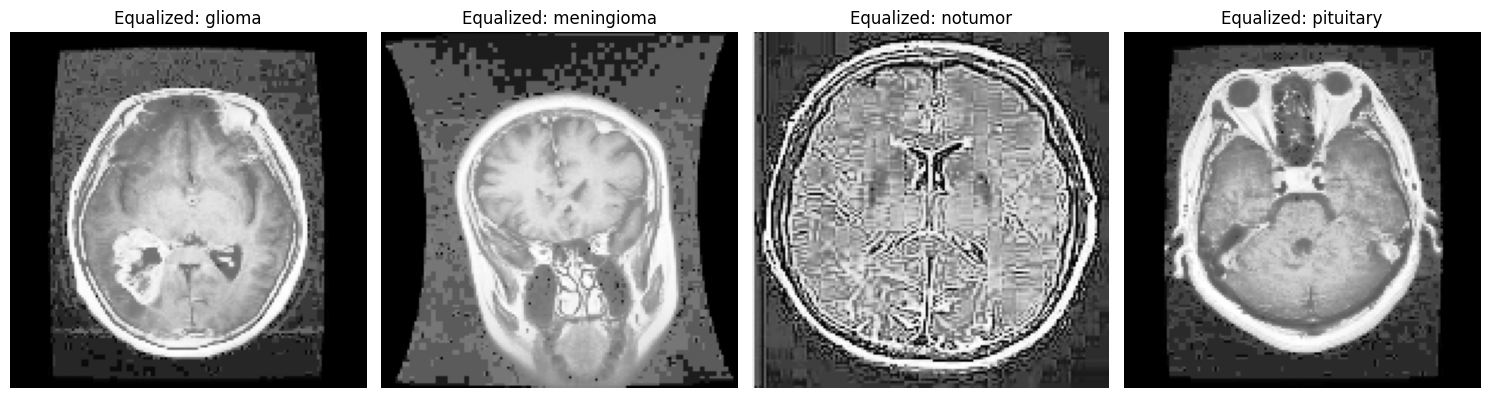

In [ ]:
# Load datasets
X_train, y_train = load_dataset("Training")
X_test, y_test = load_dataset("Testing")

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

# Display samples
plt.figure(figsize=(15, 8))
for i, category in enumerate(categories):
    # Find first image of each category
    idx = np.argmax(y_train[:, i])
    img = X_train[idx].squeeze()

    plt.subplot(2, 4, i + 1)  # Adjust grid based on category count
    plt.imshow(img, cmap="gray")
    plt.title(f"Equalized: {category}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),  # Helps prevent overfitting
        Dense(4, activation="softmax"),  # 4 output classes
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Show model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,292 (18.42 MB)

 Trainable params: 4,828,292 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test)
)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 163ms/step - accuracy: 0.6397 - loss: 0.9023 - val_accuracy: 0.8185 - val_loss: 0.4529
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 161ms/step - accuracy: 0.8651 - loss: 0.3771 - val_accuracy: 0.8757 - val_loss: 0.3642
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.9024 - loss: 0.2726 - val_accuracy: 0.8886 - val_loss: 0.2668
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 154ms/step - accuracy: 0.9161 - loss: 0.2230 - val_accuracy: 0.8909 - val_loss: 0.2631
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.9334 - loss: 0.1717 - val_accuracy: 0.9321 - val_loss: 0.1808
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.9474 - loss: 0.1424 - val_accuracy: 0.9245 - val_loss: 0.1861
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.9557 - loss: 0.1217 - val_accuracy: 0.9405 - val_loss: 0.1670
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.9579 - loss: 0

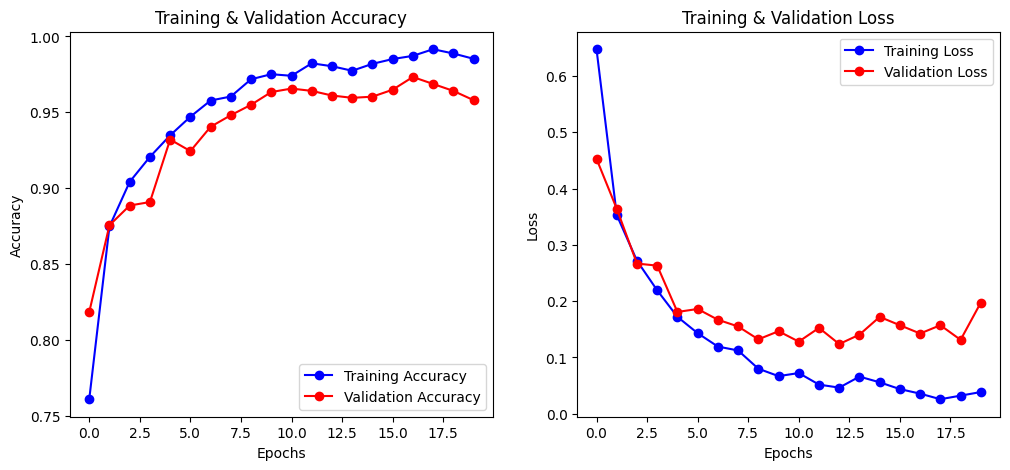

In [ ]:
# Extract training and validation accuracy & loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  # Number of epochs

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "bo-", label="Training Accuracy")
plt.plot(epochs, val_acc, "ro-", label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro-", label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to a new image
img_path = "./data/Testing/glioma/Te-gl_0010.jpg"  # Change this to your test image path

img = image.load_img(img_path, target_size=(150, 150), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Map class index to label
class_labels = ["glioma", "meningioma", "notumor", "pituitary"]
print(f"Predicted class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: notumor
